In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np


In [2]:
from sklearn.decomposition import pca

In [3]:
from scipy.stats import multivariate_normal
from sklearn import metrics

In [4]:
import scipy.stats as stats

# Задача 1

In [5]:
x = np.linspace(-10, 10, 10000)
y = stats.t.pdf(x, 100)

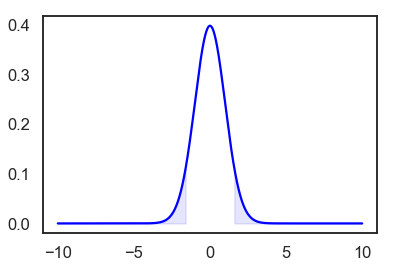

In [6]:
plt.plot(x,y, color ='b')

Data_index = np.where(x>1.6)
plt.fill_between(x[Data_index], y[Data_index], alpha = 0.1, color ='b')
Data_index = np.where(x<-1.6)
plt.fill_between(x[Data_index], y[Data_index], alpha = 0.1, color ='b')

plt.savefig('first.pdf')

In [7]:
x = np.linspace(-10, 10, 10000)
y_pow = stats.t.pdf(x, 100, loc= 4)

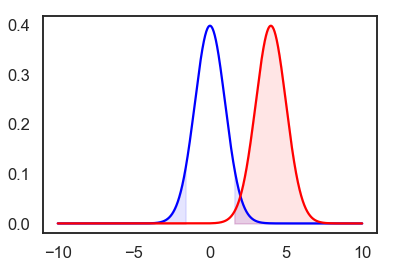

In [8]:
plt.plot(x, y, color ='b')
Data_index = np.where(x>1.6)
plt.fill_between(x[Data_index], y[Data_index], alpha = 0.1, color ='b')
Data_index = np.where(x<-1.6)
plt.fill_between(x[Data_index], y[Data_index], alpha = 0.1, color ='b')

plt.plot(x, y_pow, color = 'r')
Data_index = np.where(x>1.6)
plt.fill_between(x[Data_index], y_pow[Data_index], alpha = 0.1, color ='r')
Data_index = np.where(x<-1.6)
plt.fill_between(x[Data_index], y_pow[Data_index], alpha = 0.1, color ='r')

plt.savefig('first_pow.pdf')

In [9]:
N = 100

In [10]:
X = np.random.normal(loc = 0.0, scale = 1.0, size=N)

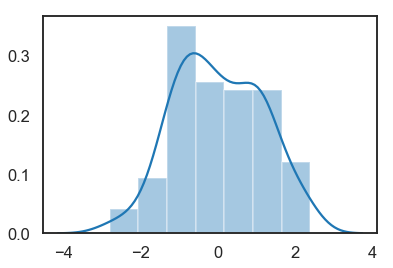

In [11]:
sns.distplot(X)

In [12]:
m = np.mean(X)
std = np.std(X)

T = m/(std/np.sqrt(N)) #распределение стюдента

print(m, std, np.abs(T), np.abs(T) < 1.660)

0.0271090734904 1.12824047048 0.240277442617 True


# Задача 2

## a)

In [162]:
n = 100
m1 = 1000
m2 = 2000

mean = np.zeros(n)
sigma = 1.0 * np.eye(n)
alpha = 0.0001 * np.eye(n)

In [163]:
X_train = multivariate_normal.rvs(mean=mean, cov=sigma, size=m1)
X_test = multivariate_normal.rvs(mean=mean, cov=sigma, size=m2)

weight = multivariate_normal.rvs(mean=mean, cov=sigma, size=1)

y_train = np.round(1.0/(1.0 + np.exp(-np.sum(X_train*weight, axis = 1))))
y_test = np.round(1.0/(1.0 + np.exp(-np.sum(X_test*weight, axis = 1))))

In [164]:
metrics.roc_auc_score(np.round(y_train), 1.0/(1.0 + np.exp(-np.sum(X_train*weight, axis = 1))))

1.0

In [16]:
metrics.roc_auc_score(np.round(y_test), 1.0/(1.0 + np.exp(-np.sum(X_test*weight, axis = 1))))

1.0

## b)

In [17]:
n = 100
m1 = 1000
m2 = 20

mean = np.zeros(n)
sigma = 1.0 * np.eye(n)
alpha = 0.0001 * np.eye(n)

In [18]:
X_train = multivariate_normal.rvs(mean=mean, cov=sigma, size=m1)
X_test = multivariate_normal.rvs(mean=mean, cov=sigma, size=m2)

weight = multivariate_normal.rvs(mean=mean, cov=sigma, size=1)

y_train = np.round(1.0/(1.0 + np.exp(-np.sum(X_train*weight, axis = 1))))
y_test = np.round(1.0/(1.0 + np.exp(-np.sum(X_test*weight, axis = 1))))

In [19]:
list_of_suma = []
list_of_m2 = np.int64(np.linspace(100, 100000, 10))

In [20]:
m = 1

for _m2 in list_of_m2:
    _suma = 0.0
    _X = multivariate_normal.rvs(mean=mean, cov=sigma, size=_m2)
    _y = np.round(1.0/(1.0 + np.exp(-np.sum(_X*weight, axis = 1))))
    
    for i in range(m):
        w = multivariate_normal.rvs(mean=mean, cov=sigma, size=1)
        _suma += metrics.roc_auc_score(np.round(_y), 1.0/(1.0 + np.exp(-np.sum(_X*w, axis = 1))))

    _suma /= m
    list_of_suma.append(_suma)

In [21]:
print(list_of_suma)

[0.60417503010839024, 0.46409182197537413, 0.52848755129699709, 0.52592060452431255, 0.48816416898979209, 0.49025444362430759, 0.57876790901073782, 0.49620579579279145, 0.5128324670904979, 0.4786808952323901]


In [22]:
S = np.array([[1,1],[2,3]])
E = np.eye(2)
B = S.T@E@S

In [23]:
p = np.array([0.3, 0.7])

In [24]:
p1 = S@p

In [25]:
B

array([[  5.,   7.],
       [  7.,  10.]])

# Задача 4

In [54]:
from scipy import integrate

In [59]:
def _p_value(a, mu = 0.0, var = 1.0):
    val, _ = integrate.quad(lambda x: multivariate_normal.pdf(x,mean=mu, cov=var), np.abs(a), 10)
    return 2*val

In [71]:
n = 100
sigma = np.diag(np.linspace(1, n, n))
mean0 = np.zeros(n)
mean1 = np.zeros(n)
mean1[:1] = 1

In [72]:
list_of_m0 = [100,500,1000,5000, 100,500,1000,500, 5000,1000]
list_of_m1 = [100,500,1000,5000, 500,100,500,1000, 1000,5000]

In [64]:
List = []
for m0, m1 in zip(list_of_m0, list_of_m1):
    FP = []
    RP = []
    p_val = []
    for i in range(100):
        X0 = multivariate_normal.rvs(mean=mean0, cov=sigma, size=m0)
        X1 = multivariate_normal.rvs(mean=mean1, cov=sigma, size=m1)

        sig0 = np.std(X0, axis=0)
        sig1 = np.std(X1, axis=0)
        sig = np.mean([sig0, sig1])
        M0 = np.mean(X0, axis=0)
        M1 = np.mean(X1, axis=0)

        ksi = (M0-M1)/(sig * np.sqrt((m0+m1)/(m0*m1)))
        
        p_val_i = np.zeros_like(ksi)
        for j in range(ksi.shape[0]):
            p_val_i[j] = _p_value(ksi[j], mu = 0.0, var = 1.0)
        
        p_val.append(p_val_i)
        
#         FP.append(np.sum((np.abs(ksi) < 1.960)[50:])/np.size((np.abs(ksi) < 1.960)[50:]))
#         RP.append(1 - np.sum((np.abs(ksi) < 1.960)[:50])/np.size((np.abs(ksi) < 1.960)[:50]))
    
    p_val = np.mean(p_val, axis=0)
    
    Bengamini_p_values = np.array(p_val)

    Bengamini_p_values.sort()
    
    Bengamini_p_values[n-1] = min(1, Bengamini_p_values[n-1])

    for i in range(2, n):
        Bengamini_p_values[n-i] = min(1, n/(n-i + 1)*Bengamini_p_values[n-i], Bengamini_p_values[n-i+1])
    
    List.append([m0, m1, m0+m1, p_val, Bengamini_p_values])

In [97]:
bpval = np.ones(shape = [len(List), n])
pval = np.ones(shape = [len(List), n])
M = np.zeros(shape = [len(List)])

In [98]:
for (_, _, m, _pval, _bpval), i in zip(List, range(len(List))):
    M[i] = m
    pval[i] = _pval
    bpval[i] = _bpval
    

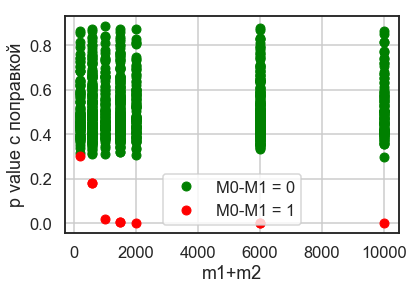

In [139]:
plt.plot(M, pval[:,99], 'go', label = 'M0-M1 = 0')
plt.plot(M, pval[:,1:99], 'go')
plt.plot(M, pval[:,0], 'ro', label = 'M0-M1 = 1')

plt.grid()

plt.xlabel('m1+m2')
plt.ylabel('p value с поправкой')

plt.legend(loc='best')

plt.savefig('forth_p.pdf')

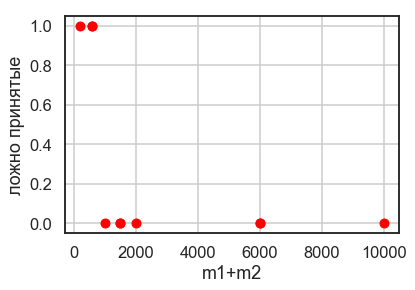

In [156]:
plt.plot(M, np.sum(bpval[:,:1] > 0.05, axis = 1), 'ro')

plt.grid()

plt.xlabel('m1+m2')
plt.ylabel('ложно принятые')

# plt.legend(loc='best')

plt.savefig('forth_FP.pdf')

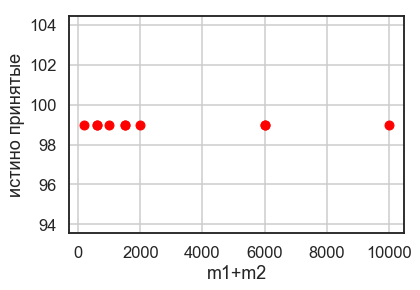

In [161]:
plt.plot(M, np.sum(bpval[:,1:] > 0.05, axis = 1), 'ro')

plt.grid()

plt.xlabel('m1+m2')
plt.ylabel('истино принятые')

# plt.legend(loc='best')

plt.savefig('forth_TP.pdf')

In [146]:
print('Ложно отклоненные')
print('Без поправки:', np.sum(pval[0,1:] < 0.05))
print('Бенджамини:', np.sum(bpval[0,1:] < 0.05))

print('\n')

print('Ложно принятые')
print('Без поправки:', np.sum(pval[0,:1] > 0.05))
print('Бенджамини:', np.sum(bpval[0,:1] > 0.05))

Ложно отклоненные
Без поправки: 0
Бенджамини: 0


Ложно принятые
Без поправки: 1
Бенджамини: 1


# Задача 5

In [384]:
n = 4
m = 400

mean = np.zeros(n)
sigma = 100.0 * np.eye(n)

In [385]:
X = multivariate_normal.rvs(mean=mean, cov=sigma, size=m)

In [386]:
u,s,v = np.linalg.svd(X)

In [387]:
s

array([ 215.38216048,  207.75734861,  194.73556825,  181.68976437])

## 3)

In [974]:
n = 5
m = 400

mean = np.zeros(n)
sigma = np.eye(n)

In [983]:
k = 3

In [984]:
X_first = np.reshape(multivariate_normal.rvs(mean=mean, cov=sigma, size=m), [m,n]) + np.random.normal(size = [m,1])

X = np.hstack([X_first, k*np.random.normal(size = [m,1])])

In [985]:
u,s,v = np.linalg.svd(X)

In [986]:
np.argmax(np.abs(v[0]))

5

In [987]:
List = []

for i in range(500):
    X_first = np.reshape(multivariate_normal.rvs(mean=mean, cov=sigma, size=m), [m,n]) + np.random.normal(size = [m,1])
    X = np.hstack([X_first, k*np.random.normal(size = [m,1])])
    
    u,s,v = np.linalg.svd(X)
    
    List.append(np.argmax(np.abs(v[0])))
    

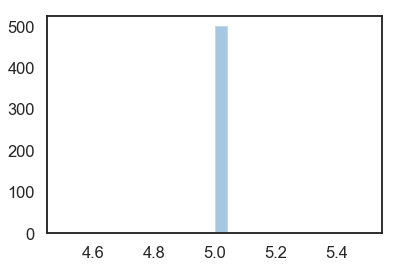

In [988]:
sns.distplot(List, kde=False)

plt.savefig('fifth_3.pdf')

In [852]:
pc_t = pca.PCA()

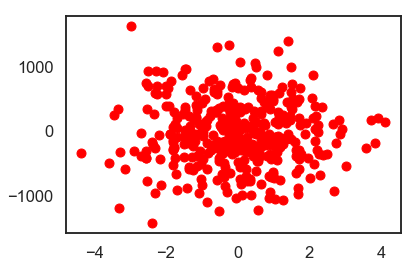

In [854]:
plt.plot(X[:,0], X[:,2], 'ro')